In [22]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.interpolate import interp1d
import seaborn.objects as so
from scipy.stats import chi2_contingency

In [23]:
cancellations_scotland_fp = os.path.join(os.getcwd(), "datasets", "cancellations_in_scotland.csv")
cancellations_scotland = pd.read_csv(cancellations_scotland_fp)

In [24]:
# drop uncessary columns drop also country cos its only scotland and like everything is the same and id too cos like useless yk
cancellations_scotland.drop(columns=["_id","Country","TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)

In [25]:
cancellations_scotland["Month"] = pd.to_datetime(cancellations_scotland.Month, format="%Y%m")
(cancellations_scotland.Month.value_counts() > 1).sum()

0

In [26]:
cancellations_scotland

,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,2015-05-01,28810,2695,1057,853,523,262
1,2015-06-01,30941,2800,1194,870,449,287
2,2015-07-01,27725,2642,1083,854,457,248
3,2015-08-01,28948,2630,1080,912,491,147
4,2015-09-01,30938,2829,1122,1000,535,172
...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87
101,2023-10-01,24201,2286,775,797,580,134
102,2023-11-01,25922,2277,737,820,582,138
103,2023-12-01,20837,2014,677,725,515,97


In [27]:
def get_season(x):
    monts = x.month
    if monts in [12,1,2]:
        return "Winter"
    elif monts in [3,4,5]:
        return "Spring"
    elif monts in [6,7,8]:
        return "Summer"
    else:
        return "Autum"
   
        
cancel_scotland = cancellations_scotland.copy(True)
cancel_scotland["Season"] = cancellations_scotland["Month"].apply(get_season)
cancel_scotland
cancel_scotland.drop(columns=["Month","TotalOperations","TotalCancelled"], inplace=True)
cancel_scotland
seasonal_sum = cancel_scotland.groupby("Season").sum()
seasonal_sum
crosstab_df = pd.pivot_table(seasonal_sum, index='Season', aggfunc='sum')

print(crosstab_df)



        CancelledByPatientReason  ClinicalReason  NonClinicalCapacityReason  \
Season                                                                        
Autum                      22011           22438                      14623   
Spring                     19755           19126                      12873   
Summer                     21276           20380                      12956   
Winter                     21242           20248                      15573   

        OtherReason  
Season               
Autum          2739  
Spring         2538  
Summer         2799  
Winter         2691  


In [28]:
#performing the chi test
chi2_stat, p_val, dof, expected = chi2_contingency(crosstab_df)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(pd.DataFrame(expected, index=crosstab_df.index, columns=crosstab_df.columns))

Chi-square statistic: 251.56492057907226
P-value: 4.66179921136406e-49
Degrees of freedom: 9
Expected frequencies table:
        CancelledByPatientReason  ClinicalReason  NonClinicalCapacityReason  \
Season                                                                        
Autum               22333.446182    21779.111203               14845.419325   
Spring              19616.693794    19129.790901               13039.548073   
Summer              20743.645609    20228.770822               13788.652001   
Winter              21590.214414    21054.327074               14351.380601   

        OtherReason  
Season               
Autum   2853.023291  
Spring  2505.967231  
Summer  2649.931568  
Winter  2758.077910  


CancelledByPatientReason      int64
ClinicalReason                int64
NonClinicalCapacityReason     int64
OtherReason                   int64
Season                       object
dtype: object


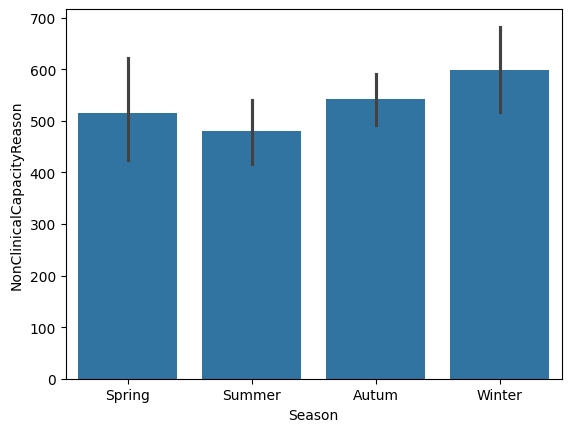

In [ ]:

sns.barplot(data=cancel_scotland, x="Season", y="NonClinicalCapacityReason")
print(cancel_scotland.dtypes)
#seasonal = cancel_scotland.groupby("Season").sum()
# it indeed peaks in december